# Mattermost Lunch Channel History

- Data Source: [Mattermost API](https://api.mattermost.com/), [CCTB instance](https://cctb-intern.biologie.uni-wuerzburg.de/)
- Tasks:
	- Part I - June 2024: retrieving chat history data through the mattermost API
	- Part II - September 2024: analyzing messages in the lunch channel
	- Part III - September 2024: specific tasks
- Language: [python](https://www.python.org/)

## Select one of the following tasks

> General comment: your estimate in step 1 does not need to be perfect, settle for a heuristic that is good enough

### Task A - most crowded day of the week
- estimate the total number of people having lunch (or coffee) at the CCTB/mensa for each day → when was the time that most people went to lunch?
- plot the number of people per day over time (also try to summarize by week/month/year)
- plot a boxplot for the number of people per day of the week → what is the most crowded day of the week?
- make the same plot as above, but separately for every month/year → is there a shift in day of the week preference?
- perform a statistical test for the hypothesis: "Mondays and Fridays are less crowded than Tuesday to Thursday"
- discuss caveats of the data and methods used

### Task B - lunch time
- estimate the time of lunch/coffee for each day → when was the most popular time?
    - try to consider proposed times ("mensa at 12?", "11:15?")
    - direct calls ("mensa?", "now")
    - relative times ("lunch in 5min", "mensa in half an hour?")
- plot the lunch time over the years (also try to summarize by week/month/year) → is there a trend (gradual shift or break point(s)) in lunch time?
- plot a boxplot for the lunch time per day of the week → is there a difference in lunch time per day of the week?
- make the same plot as above, but separately for every month/year → is the pattern above consistent over the year(s)?
- perform a statistical test for the hypothesis: "Lunch time is later during semester break (April,May,August,September) than during lecture period since 2022"
- discuss caveats of the data and methods used

### Task C - your own idea
If you have other ideas, feel free to follow them, but create a plan similar to that for Task A and B above, before you start.

In [2]:
import numpy as np

In [3]:
np.random.seed(42)
" → ".join(np.random.permutation("AJ Magdalena Felix Jannik Robin".split()))

'Magdalena → Robin → Felix → AJ → Jannik'

## 1. Data loading

Load files:
- `messages.csv`
- `reactions.csv`
- `files.csv`

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt

In [45]:
messages = pd.read_csv('messages.csv')
reactions = pd.read_csv('reactions.csv')
files = pd.read_csv('files.csv')

In [48]:
date = pd.to_datetime(messages['create_at'])  

date["day_of_week"] =date[1].dt.day_name()

date["hour"] =date[1].dt.hour



AttributeError: 'Timestamp' object has no attribute 'dt'

In [31]:
date=date.datetime.weekday()
date

AttributeError: 'Series' object has no attribute 'datetime'

SyntaxError: invalid syntax (4294287132.py, line 1)

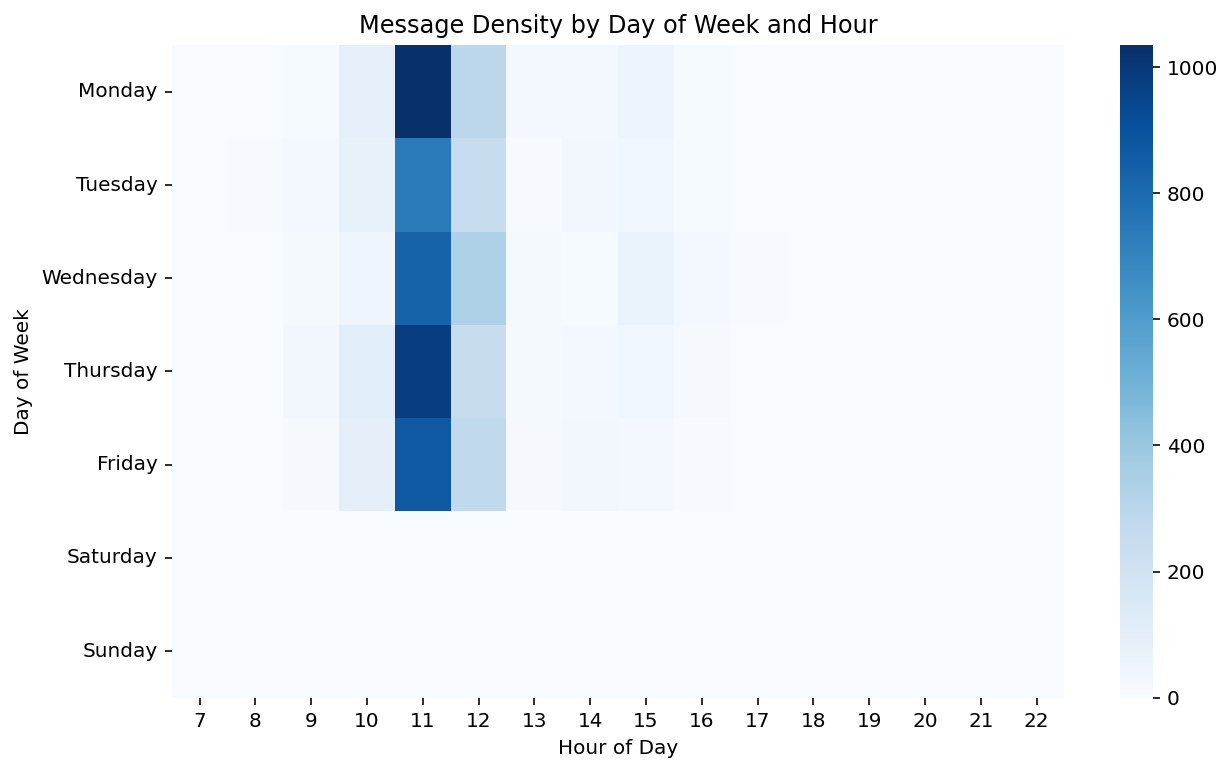

In [60]:
import seaborn as sns 
import matplotlib

messages = pd.read_csv('messages.csv')
messages

# Convert 'create_at' to datetime
messages['create_at'] = pd.to_datetime(messages['create_at'])
messages

# Extract day of the week and hour
messages['day_of_week'] = messages['create_at'].dt.day_name()
messages['hour'] = messages['create_at'].dt.hour
messages 

# Group by day of the week and hour to get message density
heatmap_data = messages.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reorder days to start from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=False)

plt.title('Message Density by Day of Week and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

# Show the plot
plt.show()

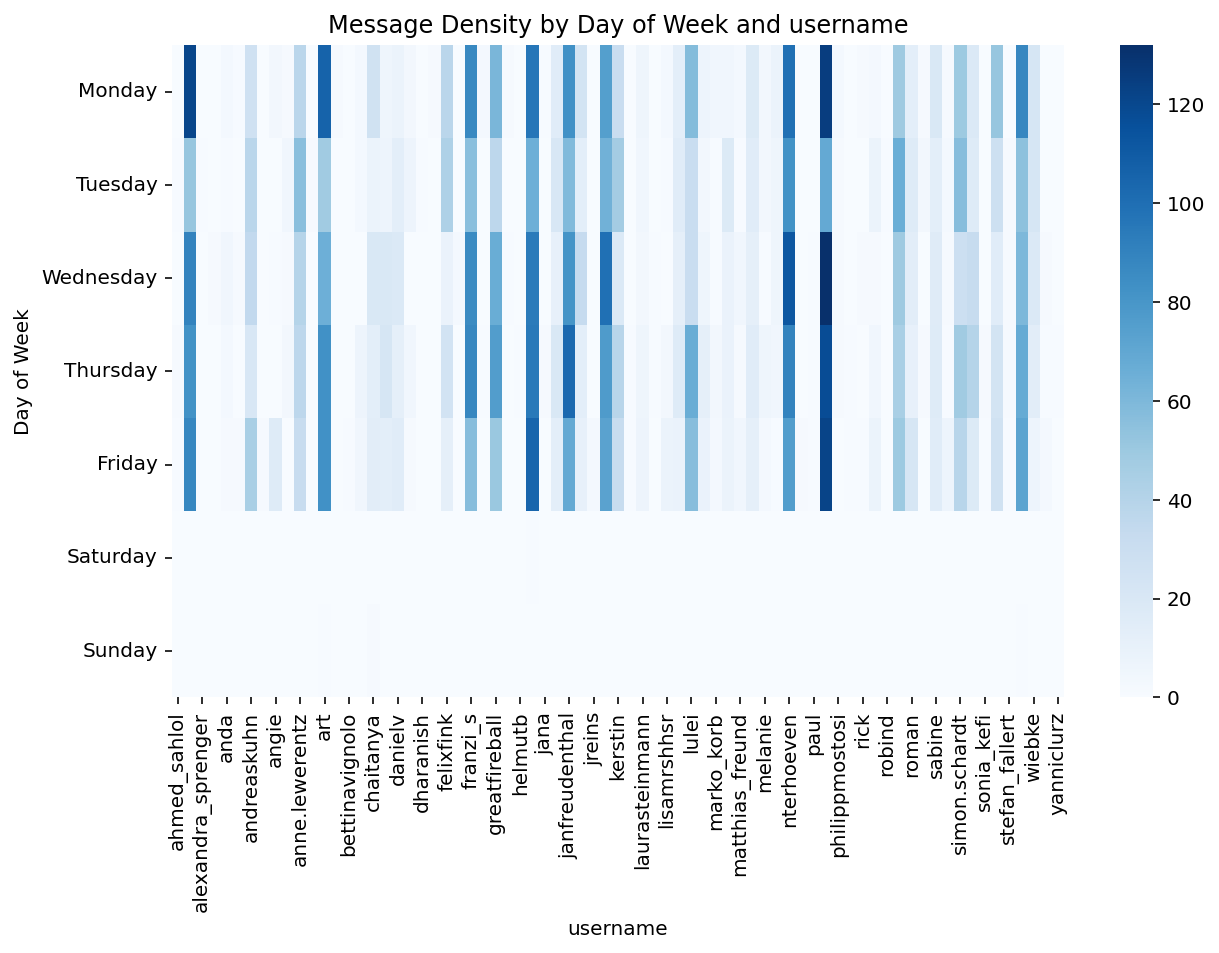

In [63]:
messages

# Group by day of the week and hour to get message density
user_heatmap_data = messages.groupby(['day_of_week', 'username']).size().unstack(fill_value=0)
user_heatmap_data 


# Reorder days to start from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
user_heatmap_data  = user_heatmap_data .reindex(day_order)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(user_heatmap_data , cmap='Blues', annot=False)

plt.title('Message Density by Day of Week and username')
plt.xlabel('username')
plt.ylabel('Day of Week')

# Show the plot
plt.show()

In [0]:
messages

# Group by day of the week and hour to get message density
user_heatmap_data = messages[:.groupby(['day_of_week', 'username']).size().unstack(fill_value=0)
user_heatmap_data 


# Reorder days to start from Monday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
user_heatmap_data  = user_heatmap_data .reindex(day_order)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(user_heatmap_data , cmap='Blues', annot=False)

plt.title('Message Density by Day of Week and username')
plt.xlabel('username')
plt.ylabel('Day of Week')

# Show the plot
plt.show()
                            

In [83]:
filtered_messages = messages[messages['create_at'].dt.year>2022]
#filtered_messages['create_at_date'] = filtered_messages['create_at'].dt.date()
filtered_messages["create_at"] = fltered_messages

pandas.core.series.Series